In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install paddlepaddle-gpu
!pip install "paddleocr>=2.0.6" # 2.0.6 version is recommended

     |████████████████████████████████| 435.0 MB 26 kB/s 
     |████████████████████████████████| 250 kB 13.8 MB/s 
     |████████████████████████████████| 2.7 MB 51.0 MB/s 
     |████████████████████████████████| 948 kB 55.6 MB/s 
     |████████████████████████████████| 55.7 MB 57 kB/s 
     |████████████████████████████████| 57 kB 7.1 MB/s 
     |████████████████████████████████| 603 kB 57.1 MB/s 
     |████████████████████████████████| 50 kB 8.4 MB/s 
  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
     |████████████████████████████████| 404 kB 63.9 MB/s 
     |████████████████████████████████| 2.1 MB 52.3 MB/s 
     |████████████████████████████████| 64 kB 3.4 MB/s 
     |████████████████████████████████| 127 kB 66.2 MB/s 
     |████████████████████████████████| 191 kB 66.4 MB/s 
     |████████████████████████████████| 42 kB 852 kB/s 
     |████████████████████████████████| 69 kB 10.5 MB/s 
     |████████████████████████████████| 2.0 MB 63.0 MB/s 
     |████████████████

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from google.colab.patches import cv2_imshow
from PIL import Image

# Also switch the language by modifying the lang parameter
ocr = PaddleOCR(lang="korean") # The model file will be downloaded automatically when executed for the first time
img_path ="/content/drive/My Drive/PaddleOCR/testimg/1.jpg"
result_path = "/content/drive/My Drive/PaddleOCR/testimg/result.jpg"
crop_path = "/content/drive/My Drive/PaddleOCR/testimg/crop.jpg"

[2021/12/08 02:33:58] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/08 02:33:58] root WARNING: lang korean is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/08 02:33:58] root WARNING: version PP-OCRv2 not support cls models, auto switch to version PP-OCR
download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_ppocr_mobile_v2.0_det_infer.tar to /root/.paddleocr/2.3.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer/en_ppocr_mobile_v2.0_det_infer.tar


100%|██████████| 3.16M/3.16M [00:10<00:00, 305kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/korean_mobile_v2.0_rec_infer.tar to /root/.paddleocr/2.3.0.2/ocr/rec/korean/korean_mobile_v2.0_rec_infer/korean_mobile_v2.0_rec_infer.tar


100%|██████████| 4.10M/4.10M [00:11<00:00, 370kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/2.3.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 1.45M/1.45M [00:08<00:00, 163kiB/s]


Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.3.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.3.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_polygon=True, e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, hel

In [ ]:
cd "/content/drive/My Drive/Yolov4/darknet"

/content/drive/My Drive/Yolov4/darknet


In [ ]:
# make darknet (builds darknet so that you can then use the darknet.py file and have its dependencies)
!make

chmod +x *.sh


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io, os
import html
import time
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:
model_file = '/content/drive/My Drive/해커톤/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [ ]:
# SRGAN으로 고해상도 이미지 생성
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

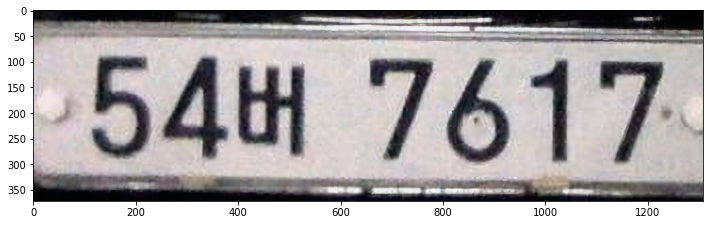

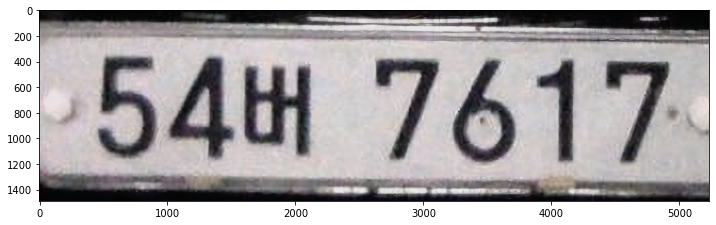

In [ ]:
hr_image = cv2.imread(crop_path)
hr_image = cv2.cvtColor(hr_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 10))
plt.imshow(hr_image)

srgan_hr = apply_srgan(hr_image)

plt.figure(figsize=(12, 10))
plt.imshow(srgan_hr)

In [ ]:
# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("cfg/yolov4-ANPR.cfg", "data/obj.data", "backup/yolov4-ANPR.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

In [ ]:
import sqlite3

db_path = '/content/drive/My Drive/PaddleOCR/testimg/mydb.db'

conn = sqlite3.connect(db_path)  # mydb.db에 연결합니다.

c = conn.cursor() # Connect() 함수의 연결을 사용하는 새로운 Cursor 객체를 만듭니다.

In [ ]:
from PIL import Image

def ocr_helper(img_path):
    result = ocr.ocr(img_path)
    image = Image.open(img_path).convert('RGB')
    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    scores = [line[1][1] for line in result]
    text = ""
    for i in txts:
        text += i
    text.replace(" ", "")
    c.execute("SELECT * FROM 자동차번호 WHERE 차번호 ='%s'" % text)

    if c.fetchone() == None:
        print("등록되지 않은 차량입니다.")
        
    else:
        print("등록된 차량입니다.")
        
    im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/drive/My Drive/PaddleOCR/NanumGothic.ttf')
    im_show = Image.fromarray(im_show)
    im_show.save('/content/drive/My Drive/PaddleOCR/testimg/result.jpg')

def show_img(imgfile):
    img = cv2.imread(imgfile, cv2.IMREAD_COLOR)
    cv2_imshow(img)

In [ ]:
def Preprocessing_plate(img):
    # grayscale region
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # resize image to three times as large as original for better readability
    gray = cv2.resize(gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)

    return gray

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>프로젝트 : </span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

<IPython.core.display.Javascript object>

[2021/12/08 02:45:06] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2021/12/08 02:45:06] root DEBUG: dt_boxes num : 2, elapse : 0.018381357192993164
[2021/12/08 02:45:06] root DEBUG: rec_res num  : 2, elapse : 0.004954814910888672
등록된 차량입니다.


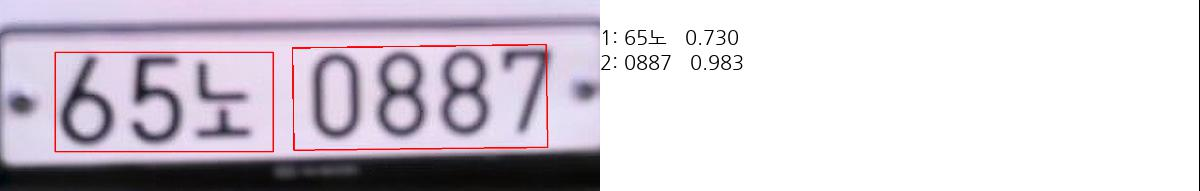

KeyboardInterrupt: ignored

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = '주차장 번호판 인식기'
# initialze bounding box to empty
bbox = ''
count = 0 

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      if label == "license_plate":
        if float(confidence) > 90.0 :  
          if count % 5 == 0 :
            cropped_img = frame[top: bottom, left: right]
            cropped_img = apply_srgan(cropped_img)
            cv2.imwrite(crop_path, cropped_img)
            ocr_helper(crop_path)
            show_img(result_path)

      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes
    count += 1
    if count == 30:
        count = 0